In [2]:
%matplotlib inline
#Imports required to run

import pynbody
from matplotlib.pylab import *
import matplotlib.pylab as plt
import pynbody.plot.sph as sph
import numpy as np
from scipy import interpolate

#Imports from ICgen-Binary directory
import os
sys.path.append('/astro/users/dflemin3/Desktop/ICgen')
sys.path.append('/astro/users/dflemin3/Desktop')
import isaac
import AddBinary
import binaryUtils

#Typical plot parameters that make for pretty plots
plt.rcParams['figure.figsize'] = (10,8)
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=20, usetex=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 20.0

/astro/users/dflemin3/Desktop/ICgen/isaac.pyc


In [3]:
eLong = [ 0.10320001,  0.10327085,  0.10324132,  0.10345305,  0.10378117,
        0.10432964,  0.10463819,  0.10493396,  0.10495871,  0.10505348,
        0.10528697,  0.10558308,  0.10591279,  0.10614796,  0.10610172,
        0.10594766,  0.1059037 ,  0.1059969 ,  0.10629615,  0.10651584,
        0.10673894,  0.10687857,  0.10678234,  0.10682375,  0.10709253,
        0.10741873,  0.10761064,  0.10758167,  0.10757756,  0.1076016 ,
        0.10768787,  0.10794373,  0.10825664,  0.108315  ,  0.10831546,
        0.10842478,  0.10865495,  0.10885104,  0.10909115,  0.10914137,
        0.1091617 ,  0.10921903,  0.10927783,  0.10952646,  0.10973121,
        0.10976526,  0.10979603,  0.10990168,  0.11012674,  0.11028785,
        0.11064209,  0.11073407,  0.1107543 ,  0.11068943,  0.11086638,
        0.11099614,  0.11124918,  0.11152063,  0.11155962,  0.11143892,
        0.11147274,  0.11165429,  0.11203609,  0.1123937 ,  0.112509  ,
        0.11255476,  0.11263967,  0.11272595,  0.11317602,  0.11330246,
        0.11316865,  0.11319322,  0.11321607,  0.11334076,  0.11357943,
        0.1138178 ,  0.11400496,  0.11394702,  0.11390998,  0.11410362,
        0.11436437,  0.11468607,  0.11476207,  0.11477739,  0.11462634,
        0.11473869,  0.11511029,  0.11534693,  0.11551478,  0.11546067,
        0.11537849,  0.11558245,  0.11577061,  0.11621574,  0.11631961,
        0.11630267,  0.11631718,  0.11652167,  0.11683401,  0.11710842,
        0.11722133,  0.11712069,  0.11705828,  0.11713011,  0.11742418,
        0.11761683,  0.1177356 ,  0.11760961,  0.11755773,  0.11760986,
        0.11781937,  0.11817007,  0.11824246,  0.11822459,  0.11839504,
        0.11855295,  0.11893787,  0.11914461,  0.11918149,  0.11910802,
        0.11924907,  0.11940533,  0.11969964,  0.1198838 ,  0.11978365,
        0.11976288,  0.11986643,  0.12015974,  0.12040475,  0.12043836,
        0.12037882,  0.12025806,  0.12039418,  0.12066818,  0.12098723,
        0.12102437,  0.12094683,  0.12102517,  0.12114948,  0.12132878,
        0.12173265,  0.12174609,  0.12164767,  0.12169069,  0.1219344 ,
        0.12224051,  0.12248988,  0.12241454,  0.12257518,  0.12267337,
        0.12282108,  0.1233009 ,  0.12331597,  0.12321299,  0.12314552,
        0.12318527,  0.12344161,  0.12376046,  0.12367998,  0.12371582,
        0.12378331,  0.12403729,  0.12428573,  0.1243432 ,  0.12432802,
        0.12416934,  0.12432632,  0.12450762,  0.12472346,  0.12475683,
        0.1245555 ,  0.12457556,  0.12462728,  0.12492348,  0.12502884,
        0.12499412,  0.12493914,  0.12492281,  0.12522339,  0.12541616,
        0.12555818,  0.12536558,  0.12528449,  0.12544619,  0.12558483,
        0.12578097,  0.12568615,  0.12587271,  0.12586539,  0.12606655,
        0.12635267,  0.12640983,  0.12629443,  0.12619488,  0.12647517,
        0.12666305,  0.12688662,  0.12687431,  0.12683328]

In [4]:
eHigh = [ 0.25000009,  0.24984596,  0.24976643,  0.24976507,  0.24980749,
        0.24994949,  0.25014223,  0.25010964,  0.24999986,  0.24997907,
        0.2499792 ,  0.25012419,  0.25026179,  0.25044173,  0.25030657,
        0.25019689,  0.2501372 ,  0.25023422,  0.25044107,  0.2507481 ,
        0.25085775,  0.25066927,  0.25056067,  0.25053987,  0.25061795,
        0.25078906,  0.25114975,  0.25111824,  0.25089121,  0.25086826,
        0.25092472,  0.25106292,  0.2512721 ,  0.25135062,  0.25116048,
        0.25104435,  0.25102118,  0.25104821,  0.25119411,  0.2514739 ,
        0.25144667,  0.25127057,  0.25120116,  0.25132921,  0.25147711,
        0.2517036 ,  0.25182479,  0.25163788,  0.25152892,  0.25150006,
        0.25156768,  0.25179841,  0.25197654,  0.25191428,  0.25176304,
        0.25170126,  0.25176032,  0.25202044,  0.25228648,  0.25234843,
        0.25219678,  0.25209061,  0.25212621,  0.25222631,  0.25240939,
        0.25260948,  0.25247769,  0.25235676,  0.25236028,  0.2523578 ,
        0.25252402,  0.25275603,  0.25274513,  0.25263076,  0.25254454,
        0.25256243,  0.25267938,  0.25285871,  0.25300387,  0.2527724 ,
        0.25264884,  0.25265522,  0.25269478,  0.25283735,  0.25301043,
        0.25291095,  0.25272231,  0.25262592,  0.25268254,  0.25286321,
        0.25307309,  0.25308904,  0.25290204,  0.25286905,  0.25288195,
        0.25298152,  0.25321996,  0.25342985,  0.25328805,  0.25314912,
        0.25317005,  0.25325701,  0.25341579,  0.25369621,  0.25364896,
        0.25349703,  0.25343518,  0.25352626,  0.25371143,  0.253979  ,
        0.25410969,  0.25391719,  0.25384033,  0.25381708,  0.25386714,
        0.25403856,  0.25420501,  0.25404748,  0.25393733,  0.25399068,
        0.25403827,  0.25419561,  0.25442461,  0.25435679,  0.25418362,
        0.25406634,  0.25410868,  0.25420687,  0.25443438,  0.25447921,
        0.25428495,  0.25418113,  0.25415626,  0.25429757,  0.25451668,
        0.2546509 ,  0.25447287,  0.25435997,  0.25432406,  0.25439326,
        0.25457461,  0.25477754,  0.25470049,  0.25456607,  0.25452723,
        0.25463887,  0.25479881,  0.25504259,  0.25506605,  0.25495525,
        0.25488518,  0.25489549,  0.25501219,  0.25526756,  0.25534093,
        0.25512972,  0.25501781,  0.25502723,  0.25506649,  0.25524757,
        0.2554501 ,  0.25527835,  0.25506386,  0.25502639,  0.2550879 ,
        0.25526302,  0.25543517,  0.25533601,  0.25516755,  0.25516685,
        0.2552495 ,  0.25540156,  0.25569902,  0.25568192,  0.25549941,
        0.25542402,  0.25550112,  0.25561894,  0.25586552,  0.25599847,
        0.25585325,  0.25581628,  0.25580291,  0.25587805,  0.25610336,
        0.25627852,  0.25622024,  0.2560903 ,  0.25604697,  0.25622452,
        0.25639778,  0.25671203,  0.25661468,  0.25646411,  0.25648321,
        0.25651348,  0.25661733,  0.25684923,  0.2567517 ]

#Scale for plotting purposes
eHigh = np.asarray(eHigh)
eHigh -= (.25-.1032)

In [5]:
eBig = [ 0.10320001,  0.10313038,  0.10313775,  0.10299536,  0.10300937,
        0.10332338,  0.10358821,  0.10367666,  0.10354804,  0.10349234,
        0.10355244,  0.10376881,  0.10400023,  0.10427128,  0.10431449,
        0.10417703,  0.10418216,  0.10437773,  0.10457208,  0.10481178,
        0.10484624,  0.1046102 ,  0.10452296,  0.10450718,  0.10456728,
        0.10492989,  0.10507774,  0.1048888 ,  0.10480154,  0.10489567,
        0.10490677,  0.10511411,  0.10524343,  0.10516872,  0.10515154,
        0.10513634,  0.10522349,  0.10528238,  0.10556394,  0.1056753 ,
        0.10559215,  0.10550983,  0.10559739,  0.10583684,  0.10603312,
        0.10623403,  0.1061892 ,  0.10608841,  0.10594622,  0.10602466,
        0.10622379,  0.10650524,  0.10661273,  0.10654917,  0.10646381,
        0.10649716,  0.10680164,  0.10703633,  0.10714072,  0.10710853,
        0.10698122,  0.10695819,  0.10719525,  0.10747781,  0.1075606 ,
        0.10753716,  0.1074206 ,  0.10736304,  0.10744812,  0.10755218,
        0.10779212,  0.10781835,  0.10768722,  0.10760916,  0.10773521,
        0.1077119 ,  0.10790778,  0.10806383,  0.10793958,  0.10786031,
        0.10794395,  0.10817122,  0.10835491,  0.1084694 ,  0.10830673,
        0.10838513,  0.10839077,  0.10867703,  0.10888602,  0.1090474 ,
        0.108852  ,  0.1087564 ,  0.10876391,  0.10886538,  0.10926883,
        0.10956278,  0.10950061,  0.10947014,  0.10941075,  0.10954323,
        0.10983798,  0.11005795,  0.1099891 ,  0.1099331 ,  0.10989381,
        0.11005976,  0.11037749,  0.11050818,  0.11045473,  0.11017537,
        0.11024789,  0.11039127,  0.11067488,  0.11085418,  0.11081299,
        0.1106891 ,  0.11084472,  0.11103188,  0.11127439,  0.11140537,
        0.11144512,  0.11139201,  0.11136625,  0.11152955,  0.11181608,
        0.11195366,  0.11198436,  0.11183047,  0.11185625,  0.11186066,
        0.11203991,  0.11225455,  0.11217551,  0.11225198,  0.11216199,
        0.11223405,  0.11239431,  0.11251625,  0.11248108,  0.1123189 ,
        0.1122296 ,  0.11227581,  0.11259437,  0.11265852,  0.11260636,
        0.11249226,  0.11241958,  0.11267307,  0.11288245,  0.11303503,
        0.11295294,  0.11288692,  0.11284325,  0.11299791,  0.11320581,
        0.1132751 ,  0.11323486,  0.1131171 ,  0.11307147,  0.11321871,
        0.11340153,  0.11355316,  0.11370073,  0.11358431,  0.11363872,
        0.11373338,  0.11403707,  0.11417237,  0.1141519 ,  0.11406113,
        0.11401932,  0.11417266,  0.11448962,  0.11456492,  0.11444086,
        0.11431147,  0.11429766,  0.1144287 ,  0.11468948,  0.11476344,
        0.11455037,  0.1145496 ,  0.11462136,  0.11477941,  0.11499095,
        0.11508214,  0.1149185 ,  0.11479422,  0.11480761,  0.11501953,
        0.11518434,  0.11515344,  0.11492423,  0.11500298,  0.11516687,
        0.11536579,  0.11555137,  0.11547018,  0.11538837]

In [6]:
eccLowdDelta = [ 0.10320001,  0.10279512,  0.10317618,  0.10292087,  0.10308122,
        0.10325328,  0.10312911,  0.10355173,  0.10324791,  0.10364257,
        0.10335379,  0.10357569,  0.10358062,  0.10351358,  0.10386562,
        0.10361323,  0.104022  ,  0.10372191,  0.10402828,  0.10387017,
        0.10401189,  0.10419094,  0.10404181,  0.10440545,  0.10408919,
        0.10449238,  0.10425784,  0.10442184,  0.10441854,  0.10437421,
        0.10471148,  0.10442452,  0.10481866,  0.10446564,  0.10473585,
        0.10459918,  0.10469023,  0.10481539,  0.10462106,  0.10501638,
        0.10466423,  0.10508715,  0.10480989,  0.10498155,  0.10494323,
        0.10492799,  0.1051759 ,  0.10489566,  0.10532828,  0.10491594,
        0.10523148,  0.10510211,  0.1051729 ,  0.1053081 ,  0.1051035 ,
        0.10549949,  0.10503733,  0.10545203,  0.10516095,  0.10535256,
        0.10536529,  0.10531731,  0.10567321,  0.1053711 ,  0.10584064,
        0.10543612,  0.10573412,  0.10554635,  0.1056265 ,  0.105827  ,
        0.10555729,  0.10594834,  0.1055205 ,  0.10591174,  0.10562793,
        0.10575641,  0.10573172,  0.1056407 ,  0.10592052,  0.10567756,
        0.10612197,  0.10570893,  0.10597937,  0.10585273,  0.10593954,
        0.10610281,  0.10587924,  0.1062273 ,  0.10587095,  0.10622763,
        0.10596083,  0.10613924,  0.10622768,  0.10616825,  0.10647066,
        0.10621368,  0.10659181,  0.10624794,  0.10653789,  0.10643987,
        0.10653773,  0.10673054,  0.10654309,  0.1069235 ,  0.10658344,
        0.10696087,  0.10670073,  0.10690088,  0.10692749,  0.10686915,
        0.10716173,  0.10686443,  0.10723121,  0.10695041,  0.10728226,
        0.1071434 ,  0.10721057,  0.10744318,  0.1072798 ,  0.10766694,
        0.10730998,  0.10765991,  0.10738633,  0.10761705,  0.10760482,
        0.10760845,  0.10785256,  0.10755273,  0.10797861,  0.10760749,
        0.10790446,  0.10773841,  0.10784016,  0.10795744,  0.10773767,
        0.10816111,  0.10774944,  0.1081485 ,  0.10785017,  0.10802629,
        0.10803859,  0.1079749 ,  0.10825282,  0.10796131,  0.10837625,
        0.10801557,  0.10831214,  0.10813624,  0.10816633,  0.10838291,
        0.10822361,  0.10855957,  0.10820646,  0.10861852,  0.10835801,
        0.10852534,  0.10847341,  0.10841918,  0.10863044,  0.1083814 ,
        0.10875336,  0.10839101,  0.10867534,  0.10851395,  0.10857825,
        0.10867153,  0.10851741,  0.10882528,  0.10848556,  0.10891005,
        0.10859855,  0.10880038,  0.10873018,  0.10876519,  0.10899306,
        0.10873931,  0.10910703,  0.10874492,  0.10907919,  0.10888431,
        0.10897396,  0.10904919,  0.10898932,  0.10941356,  0.10909198,
        0.10945715,  0.10912512,  0.10937449,  0.10929036,  0.10933536,
        0.10954104,  0.10931303,  0.10968701,  0.10933601,  0.10970865,
        0.10946598,  0.10960333,  0.10963691,  0.10959007,  0.1098859 ,
        0.10956917]

In [7]:
eccLowdTheta = [ 0.10320001,  0.10325391,  0.1035667 ,  0.1037058 ,  0.10399499,
        0.10450188,  0.10490472,  0.10515545,  0.10531588,  0.10525298,
        0.10560307,  0.10575597,  0.10607391,  0.10661554,  0.10661959,
        0.10658272,  0.10655005,  0.10681361,  0.10705572,  0.10729236,
        0.10729416,  0.10722244,  0.10723963,  0.10740405,  0.10778516,
        0.10801944,  0.10816521,  0.10823521,  0.10834291,  0.10844494,
        0.10873455,  0.1089658 ,  0.10917919,  0.10913413,  0.10902459,
        0.10915976,  0.10946994,  0.10995278,  0.11015016,  0.11022502,
        0.11005322,  0.11019033,  0.11039587,  0.11074926,  0.11109973,
        0.11124995,  0.11120576,  0.11117035,  0.11126347,  0.11152366,
        0.11178876,  0.11208305,  0.11217332,  0.11213834,  0.11209971,
        0.11240795,  0.11258016,  0.11264448,  0.11261904,  0.11270505,
        0.11275078,  0.11298173,  0.11354187,  0.11356686,  0.11369437,
        0.11372378,  0.11383739,  0.11400862,  0.11421231,  0.11423681,
        0.11431172,  0.1142823 ,  0.11430979,  0.11463249,  0.11492578,
        0.11507938,  0.11503826,  0.11496567,  0.11524006,  0.11540093,
        0.11560041,  0.11566942,  0.11548458,  0.11542168,  0.11544848,
        0.11564805,  0.11611361,  0.11625244,  0.11620301,  0.11613721,
        0.11624165,  0.11629119,  0.11658371,  0.11654884,  0.11656503,
        0.11645919,  0.1164916 ,  0.11666118,  0.11692039,  0.11695499,
        0.11693603,  0.11688027,  0.11692402,  0.11714675,  0.1174135 ,
        0.11752921,  0.11724615,  0.11729303,  0.11750773,  0.11772102,
        0.11809322,  0.11808618,  0.11818804,  0.11818228,  0.11828856,
        0.11855529,  0.11885964,  0.1189211 ,  0.1188586 ,  0.11899239,
        0.11922168,  0.11943664,  0.11965105,  0.11976737,  0.11970447,
        0.11963652,  0.11981666,  0.12008325,  0.12011931,  0.12016036,
        0.12017546,  0.12030876,  0.12062593,  0.12092093,  0.12110313,
        0.12104587,  0.12100488,  0.12111383,  0.12142878,  0.12160359,
        0.12165824,  0.12162938,  0.12173536,  0.1218264 ,  0.12215407,
        0.12250683,  0.1224208 ,  0.12247415,  0.12262718,  0.12281557,
        0.12303153,  0.12327747,  0.123289  ,  0.12319577,  0.12333988,
        0.12351456,  0.12385161,  0.12390247,  0.12377178,  0.12379217,
        0.12395449,  0.12428931,  0.12451096,  0.12439632,  0.12429228,
        0.12439674,  0.12469024,  0.12507507,  0.1251376 ,  0.12497755,
        0.12497505,  0.12517838,  0.12549875,  0.12571836,  0.12571982,
        0.12575603,  0.12576882,  0.12591323,  0.12626348,  0.12632975,
        0.12622782,  0.12613952,  0.12635139,  0.12663495,  0.12684293,
        0.12680704,  0.12667839,  0.12674293,  0.12701148,  0.1272694 ,
        0.12744649,  0.12738501,  0.12736282,  0.12760373,  0.12799984,
        0.12818516,  0.12812373,  0.12810745,  0.12803583]

In [8]:
time = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

In [9]:
timeLowdDelta = [  0.        ,   0.07957747,   0.15915494,   0.23873241,
         0.31830989,   0.39788736,   0.47746483,   0.5570423 ,
         0.63661977,   0.71619724,   0.79577472,   0.87535219,
         0.95492966,   1.03450713,   1.1140846 ,   1.19366207,
         1.27323954,   1.35281702,   1.43239449,   1.51197196,
         1.59154943,   1.6711269 ,   1.75070437,   1.83028185,
         1.90985932,   1.98943679,   2.06901426,   2.14859173,
         2.2281692 ,   2.30774667,   2.38732415,   2.46690162,
         2.54647909,   2.62605656,   2.70563403,   2.7852115 ,
         2.86478898,   2.94436645,   3.02394392,   3.10352139,
         3.18309886,   3.26267633,   3.3422538 ,   3.42183128,
         3.50140875,   3.58098622,   3.66056369,   3.74014116,
         3.81971863,   3.89929611,   3.97887358,   4.05845105,
         4.13802852,   4.21760599,   4.29718346,   4.37676094,
         4.45633841,   4.53591588,   4.61549335,   4.69507082,
         4.77464829,   4.85422576,   4.93380324,   5.01338071,
         5.09295818,   5.17253565,   5.25211312,   5.33169059,
         5.41126807,   5.49084554,   5.57042301,   5.65000048,
         5.72957795,   5.80915542,   5.88873289,   5.96831037,
         6.04788784,   6.12746531,   6.20704278,   6.28662025,
         6.36619772,   6.4457752 ,   6.52535267,   6.60493014,
         6.68450761,   6.76408508,   6.84366255,   6.92324002,
         7.0028175 ,   7.08239497,   7.16197244,   7.24154991,
         7.32112738,   7.40070485,   7.48028233,   7.5598598 ,
         7.63943727,   7.71901474,   7.79859221,   7.87816968,
         7.95774715,   8.03732463,   8.1169021 ,   8.19647957,
         8.27605704,   8.35563451,   8.43521198,   8.51478946,
         8.59436693,   8.6739444 ,   8.75352187,   8.83309934,
         8.91267681,   8.99225428,   9.07183176,   9.15140923,
         9.2309867 ,   9.31056417,   9.39014164,   9.46971911,
         9.54929659,   9.62887406,   9.70845153,   9.788029  ,
         9.86760647,   9.94718394,  10.02676141,  10.10633889,
        10.18591636,  10.26549383,  10.3450713 ,  10.42464877,
        10.50422624,  10.58380372,  10.66338119,  10.74295866,
        10.82253613,  10.9021136 ,  10.98169107,  11.06126854,
        11.14084602,  11.22042349,  11.30000096,  11.37957843,
        11.4591559 ,  11.53873337,  11.61831085,  11.69788832,
        11.77746579,  11.85704326,  11.93662073,  12.0161982 ,
        12.09577567,  12.17535315,  12.25493062,  12.33450809,
        12.41408556,  12.49366303,  12.5732405 ,  12.65281798,
        12.73239545,  12.81197292,  12.89155039,  12.97112786,
        13.05070533,  13.13028281,  13.20986028,  13.28943775,
        13.36901522,  13.44859269,  13.52817016,  13.60774763,
        13.68732511,  13.76690258,  13.84648005,  13.92605752,
        14.00563499,  14.08521246,  14.16478994,  14.24436741,
        14.32394488,  14.40352235,  14.48309982,  14.56267729,
        14.64225476,  14.72183224,  14.80140971,  14.88098718,
        14.96056465,  15.04014212,  15.11971959,  15.19929707,
        15.27887454,  15.35845201,  15.43802948,  15.51760695,
        15.59718442,  15.67676189,  15.75633937,  15.83591684,  15.91549431]

In [10]:
lowEcc = [ 0.02091209,  0.02100606,  0.02108593,  0.02129019,  0.0216953 ,
        0.02212484,  0.0225804 ,  0.02278596,  0.02289224,  0.02308795,
        0.02333226,  0.02353685,  0.02343969,  0.02320266,  0.02310172,
        0.02311064,  0.02289803,  0.02243549,  0.02200475,  0.02178537,
        0.02161762,  0.02161023,  0.02128884,  0.0209004 ,  0.0208859 ,
        0.0211767 ,  0.02130409,  0.02146639,  0.02137006,  0.0214979 ,
        0.02191009,  0.0223322 ,  0.02250806,  0.02266817,  0.02293522,
        0.02330537,  0.02374417,  0.02414399,  0.02425412,  0.02441362,
        0.02460828,  0.02497448,  0.0250927 ,  0.0251183 ,  0.02497433,
        0.02487522,  0.02496256,  0.02507984,  0.02510415,  0.02488558,
        0.02469788,  0.02453943,  0.02451704,  0.02447861,  0.02416999,
        0.02387747,  0.02368895,  0.02338386,  0.0234149 ,  0.0233008 ,
        0.02301894,  0.02275055,  0.02259322,  0.02248957,  0.02273338,
        0.02279   ,  0.02281078,  0.02275292,  0.02284389,  0.02311165,
        0.0234139 ,  0.02363424,  0.02387951,  0.02396268,  0.02419035,
        0.02449987,  0.02494418,  0.02531297,  0.02552475,  0.02557824,
        0.02565367,  0.02595921,  0.02628629,  0.02656733,  0.02656083,
        0.02656186,  0.02646011,  0.02625136,  0.02631886,  0.0264029 ,
        0.02638287,  0.02626626,  0.02604833,  0.02606271,  0.0260231 ,
        0.02604577,  0.02607393,  0.02584763,  0.02554675,  0.02526846,
        0.02506612,  0.02517779,  0.02503539,  0.02493836,  0.02464992,
        0.02439933,  0.0242613 ,  0.02431874,  0.02442888,  0.02449452,
        0.02448166,  0.0245097 ,  0.02446178,  0.02455256,  0.02474749,
        0.02503041,  0.02534522,  0.02551787,  0.02573894,  0.02604428,
        0.02614333,  0.02650649,  0.02682457,  0.02719618,  0.02761151,
        0.0276429 ,  0.02762907,  0.02767956,  0.02782636,  0.02802526,
        0.02828827,  0.02853778,  0.0285439 ,  0.02850075,  0.02845781,
        0.02838423,  0.02831311,  0.0284158 ,  0.02840067,  0.02834306,
        0.02820296,  0.02799538,  0.02776443,  0.02752729,  0.02745589,
        0.02756092,  0.02750635,  0.02732352,  0.02713652,  0.02678727,
        0.02660011,  0.02649812,  0.02644249,  0.02653583,  0.02659773,
        0.0266089 ,  0.02662525,  0.02669781,  0.02675996,  0.02688324,
        0.02708976,  0.02738397,  0.02771918,  0.02788799,  0.02832267,
        0.02857791,  0.0287606 ,  0.02893196,  0.0291661 ,  0.02935488,
        0.02967961,  0.03004888,  0.0302494 ,  0.0304859 ,  0.03060135,
        0.0306    ,  0.03062235,  0.03090668,  0.03099686,  0.03101739,
        0.03104674,  0.03110069,  0.0309966 ,  0.03083678,  0.03065737,
        0.03053963,  0.03045748,  0.03034397,  0.03026089,  0.03025251,
        0.03007865,  0.02989374,  0.02973554,  0.02930735,  0.02910606,
        0.02907983,  0.02899716,  0.02872784,  0.02862223]

#Scale for plotting
offset = eLong[0] - lowEcc[0]
lowEcc = np.asarray(lowEcc) + offset

In [13]:
massive = [ 0.10518858,  0.10557261,  0.10623731,  0.10699286,  0.10765728,
        0.10834757,  0.10887565,  0.10936319,  0.10982581,  0.11036955,
        0.11095593,  0.11131174,  0.11170272,  0.11213798,  0.11266574,
        0.11328022,  0.1139684 ,  0.11442032,  0.11485197,  0.11538705,
        0.11596235,  0.11643397,  0.11682297,  0.11716868,  0.11764673,
        0.11828966,  0.11880824,  0.11916159,  0.11960699,  0.12001303,
        0.12043177,  0.12090243,  0.12122044,  0.12157035,  0.12188982,
        0.1221725 ,  0.12265478,  0.1232053 ,  0.12352356,  0.12386217,
        0.12440138,  0.12478843,  0.12511784,  0.12553361,  0.12579412,
        0.12614692,  0.1263397 ,  0.12682018,  0.12731048,  0.12775148,
        0.12804291,  0.12835048,  0.12869791,  0.12926388,  0.12981891,
        0.13031371,  0.13058352,  0.13084019,  0.13117483,  0.13154087,
        0.13203669,  0.13246791,  0.1326876 ,  0.13298779,  0.13333035,
        0.13362194,  0.13415896,  0.13449219,  0.13487677,  0.13524951,
        0.13542504,  0.13559943,  0.1359346 ,  0.13630014,  0.13660482,
        0.13684921,  0.13702571,  0.13729439,  0.13766072,  0.13791993,
        0.13829099,  0.13868903,  0.13894462,  0.1392588 ,  0.13962909,
        0.13998865,  0.14032846,  0.14071338,  0.14107196,  0.14136683,
        0.14164411,  0.14193223,  0.142172  ,  0.1425591 ,  0.14294879,
        0.14320257,  0.14365503,  0.14393017,  0.14415313,  0.14442823,
        0.14472564,  0.1450121 ,  0.14541664,  0.14575355,  0.14600721,
        0.14628511,  0.14657676,  0.14692459,  0.14727476,  0.14756443,
        0.14797191,  0.14832711,  0.14860629,  0.14876039,  0.14904772,
        0.14932759,  0.14958202,  0.14978346,  0.15006502,  0.1504722 ,
        0.15082203,  0.15103976,  0.15118539,  0.15146254,  0.15167167,
        0.15202704,  0.15231906,  0.15275046,  0.1530589 ,  0.15344139,
        0.15374554,  0.15397321,  0.15421025,  0.15451297,  0.15489296,
        0.155164  ,  0.15544179,  0.15576479,  0.15602564,  0.1563724 ,
        0.15664715,  0.15673915,  0.15690646,  0.15713564,  0.15732611,
        0.15762197,  0.15797299,  0.158309  ,  0.15867609,  0.15905237,
        0.15934613,  0.1596661 ,  0.15993828,  0.1601989 ,  0.16045047,
        0.16070225,  0.16106755,  0.16140153,  0.16174829,  0.16203887,
        0.16237912,  0.16265333,  0.16286536,  0.16302566,  0.16317167,
        0.16335896,  0.16352296,  0.16375785,  0.16397852,  0.16423892,
        0.16452203,  0.16484281,  0.16506075,  0.16544932,  0.16586608,
        0.16612194,  0.16642329,  0.16670043,  0.16703165,  0.1673037 ,
        0.16755442,  0.16784266,  0.16803056,  0.16836095,  0.16872649,
        0.16899196,  0.16924995,  0.16947802,  0.16985138,  0.17007168,
        0.17025045,  0.17051315,  0.17064731,  0.17079929,  0.17104631,
        0.1712163 ,  0.17143421,  0.17177238,  0.17202154]

massiveTime = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

In [25]:
massiveEcc = [ 0.02091209,  0.02117406,  0.0212993 ,  0.02164128,  0.02211106,
        0.02257018,  0.02284298,  0.02297302,  0.0231257 ,  0.02332042,
        0.0234077 ,  0.02336222,  0.02323049,  0.02290416,  0.02266032,
        0.02253554,  0.02226499,  0.02190028,  0.02137719,  0.02099261,
        0.02098419,  0.02104613,  0.0210534 ,  0.02119805,  0.02121364,
        0.02136301,  0.0216401 ,  0.02205468,  0.02253363,  0.02290124,
        0.02314785,  0.02365149,  0.02414438,  0.02446349,  0.02500929,
        0.02515183,  0.02520259,  0.02543182,  0.0256697 ,  0.02579389,
        0.02582963,  0.02571993,  0.02550616,  0.02544912,  0.02537908,
        0.02531924,  0.02524255,  0.02501547,  0.02471723,  0.02433091,
        0.02405104,  0.02358411,  0.02335922,  0.02319338,  0.02299782,
        0.02264067,  0.0223024 ,  0.02223683,  0.022354  ,  0.02230619,
        0.02231588,  0.02245622,  0.0226342 ,  0.02274765,  0.02304744,
        0.0232426 ,  0.02362902,  0.02411374,  0.0246155 ,  0.02499347,
        0.02527654,  0.02561328,  0.02587275,  0.02608433,  0.0263938 ,
        0.0267681 ,  0.02697647,  0.02722717,  0.02722544,  0.02728349,
        0.02721724,  0.02723803,  0.02715741,  0.02704742,  0.02697419,
        0.02687276,  0.02681634,  0.02670282,  0.02642224,  0.02607502,
        0.02580204,  0.02553742,  0.02526086,  0.02525361,  0.02506306,
        0.02475574,  0.02463735,  0.02424101,  0.02390983,  0.02371217,
        0.02373783,  0.02365758,  0.02387656,  0.02384301,  0.02405787,
        0.02425388,  0.02461725,  0.02493309,  0.02530984,  0.0255532 ,
        0.02595339,  0.02634932,  0.02670883,  0.02701273,  0.0274093 ,
        0.02769499,  0.02805857,  0.0283455 ,  0.0287243 ,  0.02883707,
        0.02899794,  0.02913389,  0.0290761 ,  0.02915659,  0.0290238 ,
        0.02903076,  0.02896813,  0.02884417,  0.02874711,  0.02873978,
        0.02866609,  0.02851665,  0.028342  ,  0.02829386,  0.02811805,
        0.02787292,  0.02751292,  0.02732635,  0.02716279,  0.02712856,
        0.02698968,  0.0269974 ,  0.02701989,  0.02699242,  0.02700155,
        0.02714337,  0.02730007,  0.02743555,  0.02764554,  0.02788895,
        0.02815651,  0.02851692,  0.02883289,  0.02929016,  0.02962431,
        0.03011581,  0.03064233,  0.03109625,  0.03154427,  0.03191778,
        0.03230229,  0.03266765,  0.03310358,  0.0333251 ,  0.03347432,
        0.03351006,  0.03352767,  0.03347113,  0.03342391,  0.03348383,
        0.03335537,  0.03325285,  0.0332971 ,  0.03313794,  0.03272968,
        0.03248257,  0.03229074,  0.03212624,  0.03209128,  0.03186943,
        0.03158759,  0.03144101,  0.03139939,  0.03120375,  0.03113031,
        0.03106684,  0.0310384 ,  0.03099362,  0.03102429,  0.03103111,
        0.03116271,  0.03131951,  0.03160363,  0.03184679,  0.0321932 ,
        0.03253875,  0.03304031,  0.03352719,  0.03394604]

massiveEccTime = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

offset = eLong[0] - massiveEcc[0]
print offset

massiveEcc = np.asarray(massiveEcc) + offset

0.08228792


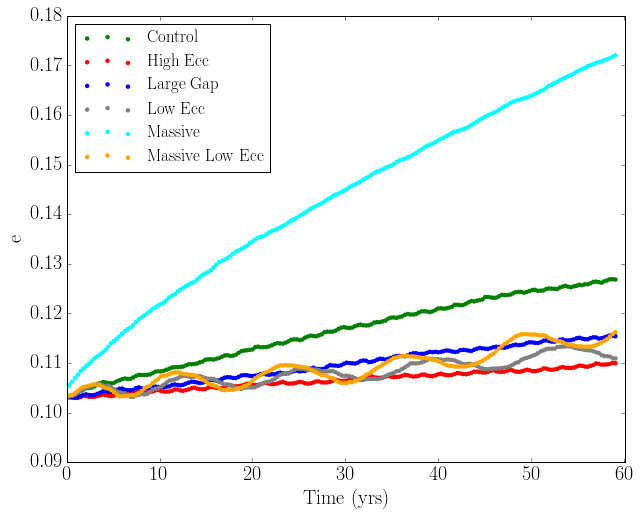

In [35]:
plt.scatter(time,eLong,c='green',label="Control",edgecolor='none')
plt.scatter(time,eHigh,c='red',label="High Ecc",edgecolor='none')
plt.scatter(time,eBig,c='blue',label="Large Gap",edgecolor='none')
#plt.scatter(timeLowdDelta,eccLowdDelta,c='orange',label="Low dDelta",edgecolor='none')
#plt.scatter(time,eccLowdTheta,c='purple',label="Low dTheta",edgecolor='none')
plt.scatter(time,lowEcc,c='grey',label="Low Ecc",edgecolor='none')
plt.scatter(massiveTime,massive,c='cyan',label="Massive",edgecolor='none')
plt.scatter(massiveEccTime,massiveEcc,c='orange',label="Massive Low Ecc",edgecolor='none')


plt.xlabel("Time (yrs)")
plt.ylabel("e")
plt.xlim(0,np.asarray(time).max()+1)
plt.legend(loc='upper left',fontsize=17)

#plt.savefig("eccPlot.pdf")